## Zadania

In [1]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames

#### Zadanie 1 (1 pkt)
Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

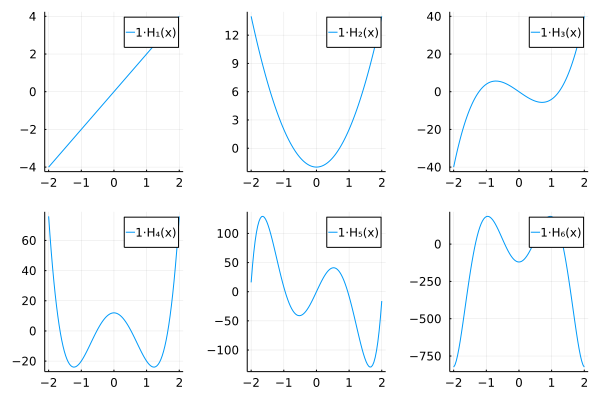

In [2]:
h1 = Hermite([0, 1])
h2 = Hermite([0, 0, 1])
h3 = Hermite([0, 0, 0, 1])
h4 = Hermite([0, 0, 0, 0, 1])
h5 = Hermite([0, 0, 0, 0, 0, 1])
h6 = Hermite([0, 0, 0, 0, 0, 0, 1])
p1 = plot(h1, -2, 2,)
p2 = plot(h2, -2, 2)
p3 = plot(h3, -2, 2)
p4 = plot(h4, -2, 2)
p5 = plot(h5, -2, 2)
p6 = plot(h6, -2, 2)
plot(p1,p2,p3,p4,p5,p6, layout=6)

#### Zadanie 2  (1 pkt)
Narysować 6 pierwszych funkcji aproksymujących

In [51]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

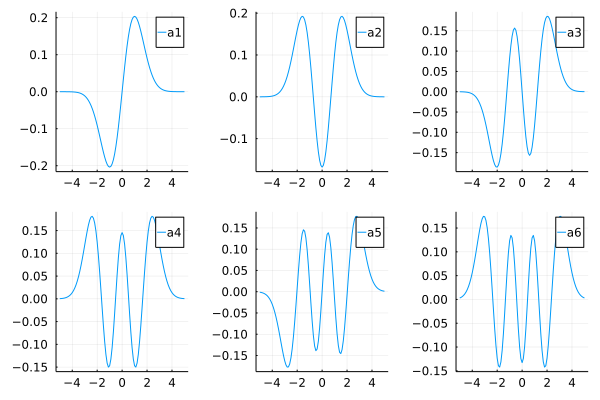

In [52]:
xx = -5:.1:5
f1 = base_fun(1, xx,true);
f2 = base_fun(2, xx,true);
f3 = base_fun(3, xx,true);
f4 = base_fun(4, xx,true);
f5 = base_fun(5, xx,true);
f6 = base_fun(6, xx,true);

p1 = plot(xx, f1, label="a1")
p2 = plot(xx, f2, label="a2")
p3 = plot(xx, f3, label="a3")
p4 = plot(xx, f4, label="a4")
p5 = plot(xx, f5, label="a5")
p6 = plot(xx, f6, label="a6")

plot(p1,p2,p3,p4,p5,p6, layout=6)

#### Zadanie 3  (1 pkt)
Pokazać, że same wielomiany nie są ortogonane, ale już z funkcją wagową $exp(-x^2)$ są. Uzyć metody z wektorami wartości, założyć pewien przedział.

In [53]:
dot_base = Array{Float64, 2}(undef, 6, 6); 

for (i, h_i) in enumerate([h1, h2, h3, h4, h5, h6]) 
    for (j, h_j) in enumerate([h1, h2, h3, h4, h5, h6])
        dot_base[i,j] = dot(normalize(h_i.(xx)),normalize(h_j.(xx)))
    end
end

dot_base

6×6 Array{Float64,2}:
  1.0          -6.93889e-18   0.900225     …   0.786828     -4.85723e-17
 -6.93889e-18   1.0          -3.46945e-17     -2.77556e-17   0.868163
  0.900225     -3.46945e-17   1.0              0.96734      -1.38778e-17
 -2.77556e-17   0.948299      5.55112e-17     -1.38778e-17   0.976819
  0.786828     -2.77556e-17   0.96734          1.0           1.38778e-17
 -4.85723e-17   0.868163     -1.38778e-17  …   1.38778e-17   1.0

In [54]:
dot_base = Array{Float64, 2}(undef, 6, 6); 

for (i, f_i) in enumerate([f1, f2, f3, f4, f5, f6]) 
    for (j, f_j) in enumerate([f1, f2, f3, f4, f5, f6])
        dot_base[i,j] = dot(f_i, f_j)
    end
end

dot_base


6×6 Array{Float64,2}:
  1.0           1.88742e-17  -9.61163e-10  …  -9.92118e-9    7.65132e-19
  1.88742e-17   1.0          -7.22228e-18     -1.74811e-18  -1.34723e-7
 -9.61163e-10  -7.22228e-18   1.0             -2.04018e-7    6.70654e-18
 -7.06347e-18  -1.67261e-8   -2.57256e-18     -8.55397e-19  -1.88351e-6
 -9.92118e-9   -1.74811e-18  -2.04018e-7       1.0           1.94377e-17
  7.65132e-19  -1.34723e-7    6.70654e-18  …   1.94377e-17   1.0

#### Zadanie 4  (1 pkt)
Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V.

In [132]:
ekg_data = CSV.read("ecg_data.csv", DataFrame);

xx_ekg = ekg_data.time*40
yy_ekgV = ekg_data.signalV;
yy_ekgN = ekg_data.signalN;



In [133]:
f0 = base_fun(0, xx_ekg,true);
f1 = base_fun(1, xx_ekg,true);
f2 = base_fun(2, xx_ekg,true);
f3 = base_fun(3, xx_ekg,true);
f4 = base_fun(4, xx_ekg,true);
f5 = base_fun(5, xx_ekg,true);
f6 = base_fun(6, xx_ekg,true);
f7 = base_fun(7, xx_ekg,true);
f8 = base_fun(8, xx_ekg,true);
f9 = base_fun(9, xx_ekg,true);
f10 = base_fun(10, xx_ekg,true);

In [134]:
c0 = dot(yy_ekgV, f0)
c1 = dot(yy_ekgV, f1)
c2 = dot(yy_ekgV, f2)
c3 = dot(yy_ekgV, f3)
c4 = dot(yy_ekgV, f4)
c5 = dot(yy_ekgV, f5)
c6 = dot(yy_ekgV, f6)
c7 = dot(yy_ekgV, f7)
c8 = dot(yy_ekgV, f8)
c9 = dot(yy_ekgV, f9)
c10 = dot(yy_ekgV, f10)

y_app_0 = c0*f0;
y_app_1 = c1*f1;
y_app_2 = c2*f2;
y_app_3 = c3*f3;
y_app_4 = c4*f4;
y_app_5 = c5*f5;
y_app_6 = c6*f6;
y_app_7 = c7*f7;
y_app_8 = c8*f8;
y_app_9 = c9*f9;
y_app_10 = c10*f10;

y_app_01 = y_app_0 + y_app_1;
y_app_012 = y_app_01 + y_app_2;
y_app_0123 = y_app_012 + y_app_3;
y_app_01234 = y_app_0123 + y_app_4;
y_app_012345 = y_app_01234 + y_app_5;
y_app_0123456 = y_app_012345 + y_app_6;
y_app_01234567 = y_app_0123456 + y_app_7;
y_app_012345678 = y_app_01234567 + y_app_8;
y_app_0123456789 = y_app_012345678 + y_app_9;
y_app_012345678910 = y_app_0123456789 + y_app_10;


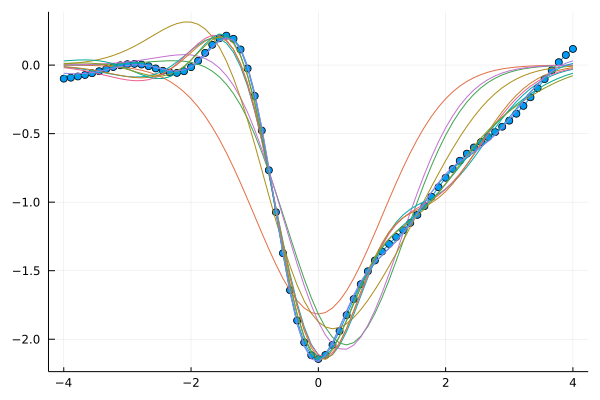

In [135]:
plot(xx_ekg, yy_ekgV, markershape=:circle, label="fun", legend=false)
p0=plot!(xx_ekg, y_app_0, label="k=0")
p1=plot!(xx_ekg, y_app_01, label="k=1")
p2=plot!(xx_ekg, y_app_012, label="k=2")
p3=plot!(xx_ekg, y_app_0123, label="k=3")
p4=plot!(xx_ekg, y_app_01234, label="k=4")
p5=plot!(xx_ekg, y_app_012345, label="k=5")
p6=plot!(xx_ekg, y_app_0123456, label="k=6")
p7=plot!(xx_ekg, y_app_01234567, label="k=7")
p8=plot!(xx_ekg, y_app_012345678, label="k=8")
p9=plot!(xx_ekg, y_app_0123456789, label="k=9")
p10=plot!(xx_ekg, y_app_012345678910, label="k=10")

In [136]:
using Statistics
mse(y1, y2) = mean((y1-y2).^2)
errV = Array{Float64}(undef, 11); 

for (i, y_i) in enumerate([y_app_0,y_app_01,y_app_012,y_app_0123,y_app_01234,y_app_012345, y_app_0123456, y_app_01234567, y_app_012345678, y_app_0123456789, y_app_012345678910]) 
    errV[i] = mse(yy_ekgN, y_i)
end

In [137]:
c0 = dot(yy_ekgN, f0)
c1 = dot(yy_ekgN, f1)
c2 = dot(yy_ekgN, f2)
c3 = dot(yy_ekgN, f3)
c4 = dot(yy_ekgN, f4)
c5 = dot(yy_ekgN, f5)
c6 = dot(yy_ekgN, f6)
c7 = dot(yy_ekgN, f7)
c8 = dot(yy_ekgN, f8)
c9 = dot(yy_ekgN, f9)
c10 = dot(yy_ekgN, f10)

y_app_0 = c0*f0;
y_app_1 = c1*f1;
y_app_2 = c2*f2;
y_app_3 = c3*f3;
y_app_4 = c4*f4;
y_app_5 = c5*f5;
y_app_6 = c6*f6;
y_app_7 = c7*f7;
y_app_8 = c8*f8;
y_app_9 = c9*f9;
y_app_10 = c10*f10;

y_app_01 = y_app_0 + y_app_1;
y_app_012 = y_app_01 + y_app_2;
y_app_0123 = y_app_012 + y_app_3;
y_app_01234 = y_app_0123 + y_app_4;
y_app_012345 = y_app_01234 + y_app_5;
y_app_0123456 = y_app_012345 + y_app_6;
y_app_01234567 = y_app_0123456 + y_app_7;
y_app_012345678 = y_app_01234567 + y_app_8;
y_app_0123456789 = y_app_012345678 + y_app_9;
y_app_012345678910 = y_app_0123456789 + y_app_10;


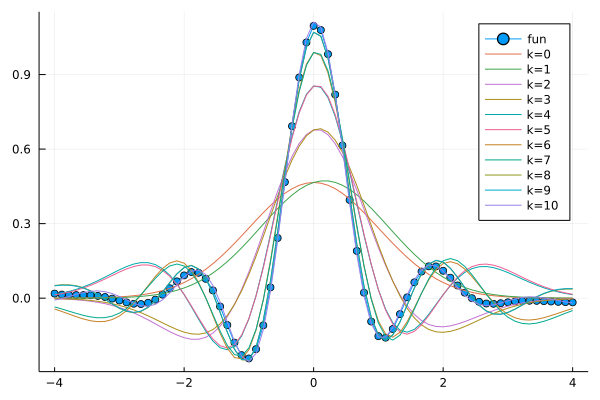

In [138]:
plot(xx_ekg, yy_ekgN, markershape=:circle, label="fun")
p0=plot!(xx_ekg, y_app_0, label="k=0")
p1=plot!(xx_ekg, y_app_01, label="k=1")
p2=plot!(xx_ekg, y_app_012, label="k=2")
p3=plot!(xx_ekg, y_app_0123, label="k=3")
p4=plot!(xx_ekg, y_app_01234, label="k=4")
p5=plot!(xx_ekg, y_app_012345, label="k=5")
p6=plot!(xx_ekg, y_app_0123456, label="k=6")
p7=plot!(xx_ekg, y_app_01234567, label="k=7")
p8=plot!(xx_ekg, y_app_012345678, label="k=8")
p9=plot!(xx_ekg, y_app_0123456789, label="k=9")
p10=plot!(xx_ekg, y_app_012345678910, label="k=10")

#### Zadanie 5  (1 pkt)
Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

In [139]:
errN = Array{Float64}(undef, 11); 

for (i, y_i) in enumerate([y_app_0,y_app_01,y_app_012,y_app_0123,y_app_01234,y_app_012345, y_app_0123456, y_app_01234567, y_app_012345678, y_app_0123456789, y_app_012345678910]) 
    errN[i] = mse(yy_ekgN, y_i)
end

errN


11-element Array{Float64,1}:
 0.05653083118425804
 0.055816908933032455
 0.03630893116640521
 0.036131760274550305
 0.017944119544999304
 0.017906033228894835
 0.005298139008481418
 0.00520028825331861
 0.0007040738883725691
 0.0007045246082865523
 0.0001460905557721477

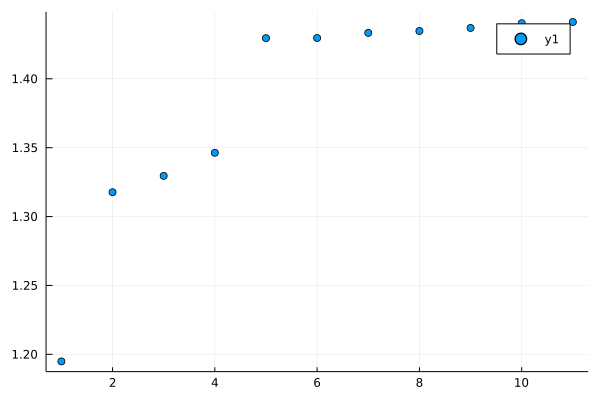

In [140]:
scatter(errV)

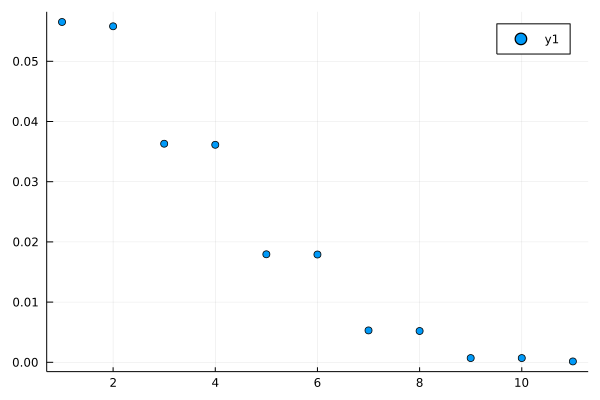

In [141]:
scatter(errN)